In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:

%cd /content/drive/MyDrive/GitHub

/content/drive/MyDrive/GitHub


In [26]:
%cd 'soil-physics-theory'

/content/drive/MyDrive/GitHub/soil-physics-theory


In [27]:
%cd 'content/chapter-5'

/content/drive/MyDrive/GitHub/soil-physics-theory/content/chapter-5


In [28]:
import os # import os package

5.1 Use the program PSP_travelTimeAnalysis to compute the water content of the soil sample dataTDRSoil.dat. Change the values of bulk density, temperature, and solid phase dielectric permittivity to investigate the effects on the computed water content by using the dielectric mixing model.

In [29]:
cd PSP_travelTimeAnalysis_NEW/

/content/drive/MyDrive/GitHub/soil-physics-theory/content/chapter-5/PSP_travelTimeAnalysis_NEW


In [30]:

run main.py


IndentationError: unindent does not match any outer indentation level (main.py, line 89)

## 5.2 If the temperature of the soil liquid phase increases, does the bulk dielectric permittivity increase or decrease? What effect would this change have on soil water content computation?

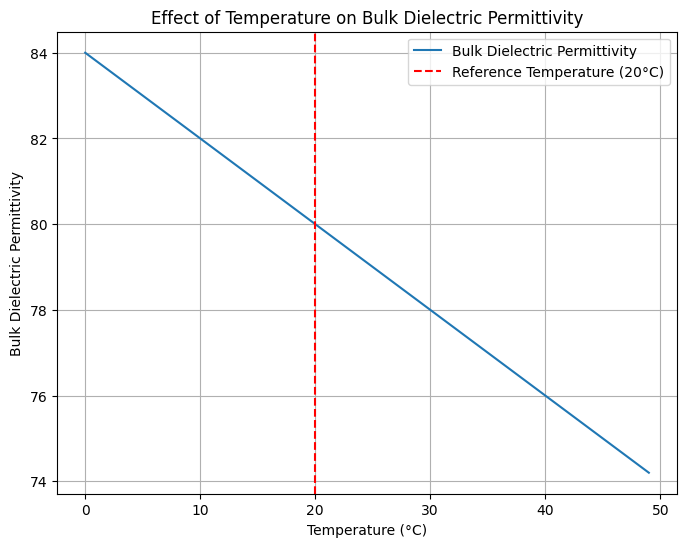

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
temperature_range = np.arange(0, 50, 1)  # Temperature range (°C)
dielectric_permittivity_ref = 80  # Reference dielectric permittivity at 20°C

# Function to compute bulk dielectric permittivity based on temperature
def compute_bulk_permittivity(temperature, permittivity_ref):
    # Assume a linear relationship between temperature and permittivity for this example
    # You may need to use a more accurate model based on your specific scenario
    # Here, we'll use a simple linear relationship for demonstration purposes
    slope = -0.2  # Change in permittivity per degree Celsius
    return permittivity_ref + slope * (temperature - 20)

# Compute bulk dielectric permittivity for the temperature range
bulk_permittivity = compute_bulk_permittivity(temperature_range, dielectric_permittivity_ref)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(temperature_range, bulk_permittivity, label='Bulk Dielectric Permittivity')
plt.title("Effect of Temperature on Bulk Dielectric Permittivity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Bulk Dielectric Permittivity")
plt.axvline(x=20, color='r', linestyle='--', label='Reference Temperature (20°C)')
plt.legend()
plt.grid(True)
plt.show()


### If the temperature of the soil liquid phase increases, the bulk dielectric permittivity decreases.

### the change in bulk dielectric permittivity due to temperature variations can introduce errors in soil water content computation by altering the relationship between dielectric permittivity and water content, as well as affecting the sensitivity and calibration of measurement techniques.

 ## 5.3 Compute the matric water potential for water in a saturated pore 10 µm in diameter, at 20 ◦C. The surface tension and liquid density at this temperature are 72.75 × 10–3 N m–1 and 1027.8 kg m–3, respectively.

In [ ]:
# Given constants
gamma = 72.75e-3  # Surface tension of water (N/m)
theta = 0         # Contact angle (degrees)
diameter = 10e-6  # Diameter of the pore (m)

# Compute radius from diameter
radius = diameter / 2

# Compute matric potential
matric_potential = (2 * gamma * np.cos(np.deg2rad(theta))) / radius

print("Matric water potential:", matric_potential, "Pa")


Matric water potential: 29099.999999999996 Pa


## 5.4 By using the integration presented in the program PSP_columnWaterContent.py, compute the total amount of soil water in a clay soil for a profile that is 1 m deep. Use the parameters presented in Table 5.4

In [11]:

alpha=0.17 #kgJ^–1
n=1.16
m=1-(1/n)
AirEP=-3.3 #air entry potential  Jkg^–1
thetaR=0.07 #m/m^3
thetaS=0.5 #m/m^3
depth=1 #
Se = 1. / (1. + (alpha * abs(AirEP))**n)**m
print ("water_content:","%.2f" %Se, "m/m3")

water_content: 0.94 m/m3


## 5.6 Compute the water content at field capacity (assume ψFC = –33 J kg–1), and permanent wilting point (assume ψPWP = –1500 J kg–1) using van Genuchten’s equation for a soil having the following parameters: α = 0.15, n = 1.35, θr = 0.01 and θs = 0.46. The units of water potential are J kg–1. Plant available water is assumed to be the difference between these values. Compute the plant available water of the soil.oil.

In [12]:
# Given van Genuchten parameters
alpha = 0.15   # Alpha (1/m)
n = 1.35      # n
theta_r = 0.01  # Residual water content
theta_s = 0.46  # Saturated water content

# Given water potentials (J/kg)
psi_FC = -33   # Field capacity
psi_PWP = -1500  # Permanent wilting point

# Function to compute water content using van Genuchten's equation
def van_genuchten(psi, alpha, n, theta_r, theta_s):
    m = 1 - (1 / n)
    theta = theta_r + (theta_s - theta_r) / (1 + (alpha * abs(psi)) ** n) ** m
    return theta

# Compute water content at field capacity and permanent wilting point
theta_FC = van_genuchten(psi_FC, alpha, n, theta_r, theta_s)
theta_PWP = van_genuchten(psi_PWP, alpha, n, theta_r, theta_s)

# Compute plant available water
PAW = theta_FC - theta_PWP

print("Water content at field capacity:", theta_FC)
print("Water content at permanent wilting point:", theta_PWP)
print("Plant available water:", PAW)


Water content at field capacity: 0.2599204483672994
Water content at permanent wilting point: 0.07758860497726532
Plant available water: 0.18233184339003405


## 5.7 Derive the capacity for Campbell’s and van Genuchten’s equations by computing the derivatives of the two functions with respect to ψ t

Derivation of the capacity for Campbell's equation by computing the derivatives of the two functions with respect to ψ:

θ = θs(ψs/ψ)^b

We differentiate both sides with respect to ψ:

d/dψ [θ] = d/dψ [θs(ψs/ψ)^b]

Using the chain rule, we get:

dθ/dψ = θs * b * (ψs/ψ)^(b-1) * (-ψs/ψ^2)

dθ/dψ = ψs^b * θs * (ψs/ψ)^(b-1)

So, the derivative of the Campbell equation with respect to soil water potential ψ is:

dθ/dψ = ψs^b * θs * (ψs/ψ)^(b-1)

This derivative describes how the soil water content changes with respect to changes in soil water potential.


Derivation of the van Genuchten’s equation by computing the derivatives of the two functions with respect to ψ:

d/dθ (θ_r + (θ_s - θ_r) (1 + (αψ)^n) - m)

= dψ/dθ (θ_r + (θ_s - θ_r) (1 + (αψ)^n) - m)

= (θ_s - θ_r) * dψ/d (1 + (αψ)^n) - m

Using the chain rule, we get:

= (θ_s - θ_r) * (-m) * (1 + (αψ)^n)^(-m-1) * dψ/d (1 + (αψ)^n)

= - (θ_s - θ_r) * (αψ)^n * (1 + (αψ)^n)^(-m-1) * dψ/d (1 + (αψ)^n)

Differentiating 1 + (αψ)^n, we obtain:

= - (θ_s - θ_r) * (αψ)^n * (1 + (αψ)^n)^(-m-1) * nαn(αψ)^(n-1)

= - mnα(θ_s - θ_r) (αψ)^(n-1) (1 + (αψ)^n)^(-m-1)

Therefore, the full differentiation of (θ_r + (θ_s - θ_r) (1 + (αψ)^n) - m) with respect to ψ is:

= - mnα(θ_s - θ_r) (αψ)^(n-1) (1 + (αψ)^n)^(-m-1)

